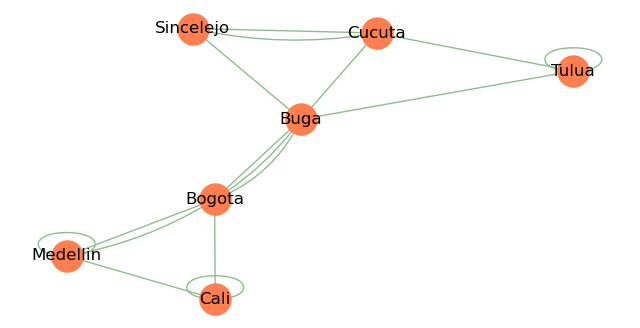

In [59]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import gzip
conexion2 = pd.DataFrame({
    "inicio": ["Cali", "Cali", "Cali", "Medellin", "Medellin", "Bogota", "Bogota", "Bogota", "Buga", "Buga", "Buga", "Buga", "Sincelejo", "Cucuta", "Cucuta", "Tulua"],
    "fin":    ["Cali", "Medellin", "Bogota", "Medellin", "Bogota", "Medellin", "Buga", "Buga", "Bogota", "Sincelejo", "Cucuta", "Tulua", "Cucuta", "Sincelejo", "Tulua", "Tulua"],
})

G2 = nx.from_pandas_edgelist(conexion2, source="inicio", target="fin", create_using=nx.MultiGraph())
pos = nx.spring_layout(G2, seed=42)

plt.figure(figsize=(8,4))
nx.draw_networkx_nodes(G2, pos, node_color="coral", node_size=500)
nx.draw_networkx_labels(G2, pos)

for u, v, k in G2.edges(keys=True):
    nx.draw_networkx_edges(G2, pos, edgelist=[(u, v)], connectionstyle=f'arc3, rad={0.1 * k}', edge_color="darkseagreen")

plt.axis('off')
plt.show()


In [61]:
paralelas = 0
contados = set()

for u, v in G2.edges():
    par = tuple(sorted([u, v]))
    if par not in contados:
        n = G2.number_of_edges(u, v)
        if n > 1:
            paralelas += n - 1
        contados.add(par)

print(paralelas)


4


In [65]:
G_simple = nx.Graph(G2)
cycles = list(nx.cycle_basis(G_simple))
print(f"Número de ciclos simples: {len(cycles)}")

Número de ciclos simples: 6
